<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/hot/Hall_hot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall effect measurements: heating


Evgeny Kolonsky 2025

v.0.1.4


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress
from scipy.interpolate import interp1d
import requests

In [11]:
# Constants
d = 1e-3 # thikness, m
L = 16e-3 # length between ohmic contacts, m
W = 10e-3 # width, m

# Part 0: zero measurements


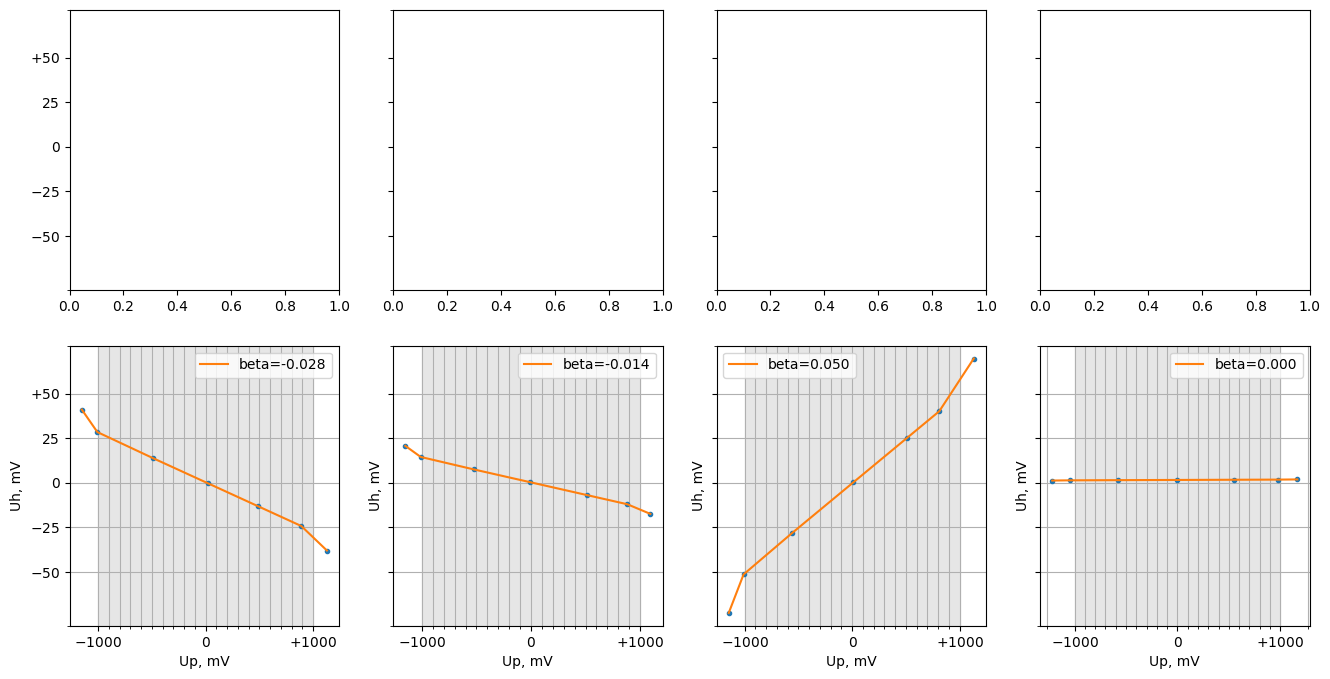

In [71]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/hot/'
names = [21, 22, 23, 24]


fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = URL+f'zero{name}.txt'
  response = requests.get(url).text
  Ip, T, Uh, Up = np.loadtxt(response.splitlines()).T
  fit = linregress(Up, Uh)
  beta, U0 = fit.slope, fit.intercept

  first_digit = name % 10
  second_digit = name // 10
  axx = ax[second_digit-1, first_digit-1]
  axx.plot(Up, Uh, '.')
  axx.plot(Up, U0 + beta*Up, label=f'{beta=:.3f}')

  axx.set_xlabel('Up, mV')
  axx.set_xscale('symlog', linthresh=1000, linscale=1)
  axx.xaxis.get_minor_locator().set_params(subs=[1, 2, 3, 4, 5, 6, 7, 8, 9])
  axx.xaxis.set_major_locator(ticker.FixedLocator([-1000, 0, 1000]))
  axx.xaxis.set_major_formatter(ticker.FixedFormatter([r'$-1000$', r'0',  r'$+1000$']))
  linthresh = axx.xaxis.get_transform().linthresh
  linscale = axx.xaxis.get_transform().linscale
  axx.axvspan(-linthresh, linthresh, color='0.9')
  axx.xaxis.grid(which='minor')  # minor grid on too

  axx.set_ylabel('Uh, mV')
  axx.set_yscale('symlog', linthresh=150, linscale=1)
  axx.yaxis.get_minor_locator().set_params(subs=[1, 2, 3, 4, 5, 6, 7, 8, 9])
  axx.yaxis.set_major_locator(ticker.FixedLocator([-50, -25, 0, 25, 50]))
  axx.yaxis.set_major_formatter(ticker.FixedFormatter([r'$-50$', r'$-25$', r'0',  r'$25$', r'$+50$']))
  axx.yaxis.grid(which='minor')  # minor grid on too
  axx.legend()
  axx.grid()


# Part 5: Hall voltage as a function of temperature $U_h(T)$

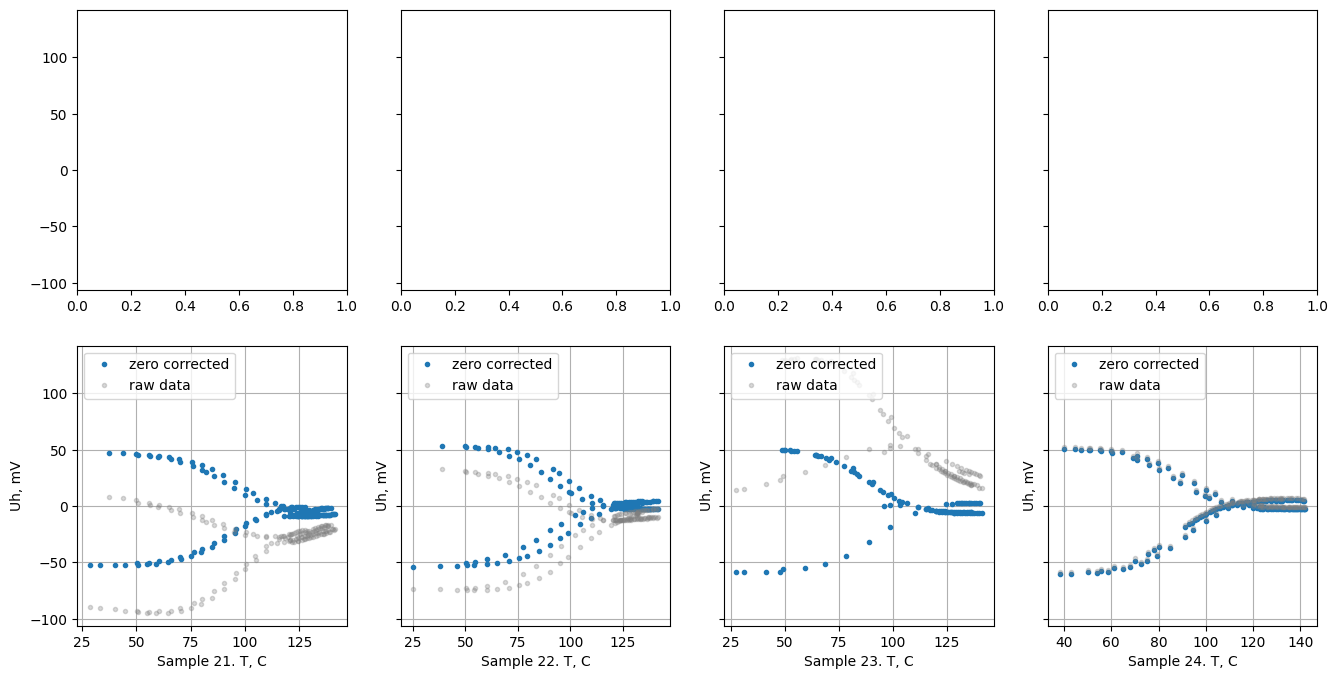

In [13]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/hot/'
names = [21, 22, 23, 24]


fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:

      url = URL + f'zero{name}.txt'
      response = requests.get(url).text
      Ip, T, Uh, Up = np.loadtxt(response.splitlines()).T
      fit = linregress(Up, Uh)
      beta, U0 = fit.slope, fit.intercept

      url = URL + f'{name}.txt'
      response = requests.get(url).text
      T, Uh_, Up = np.loadtxt(response.splitlines()).T
      Uh = Uh_ - beta*Up - U0
      #Uh = Uh_

      first_digit = name % 10
      second_digit = name // 10
      axx = ax[second_digit-1, first_digit-1]
      axx.plot(T, Uh, '.', label=f'zero corrected')
      axx.plot(T, Uh_, '.', color='gray', alpha=0.3, label=f'raw data')

      axx.set_xlabel(f'Sample {name}. T, C')
      axx.set_ylabel('Uh, mV')
      axx.legend(loc='upper left')
      axx.grid()


#